In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot

data = pd.read_csv("train.csv")
data

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


<AxesSubplot:xlabel='base_hour', ylabel='target'>

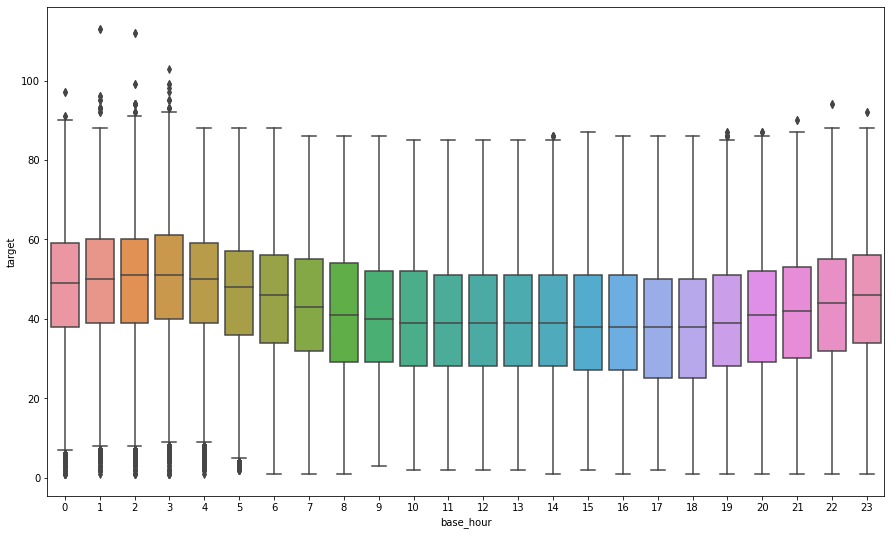

In [3]:
#Q1) base_hour (시간)에 따른 교통량 분포 : 시간에 따른 교통량 분포를 확인하기 위한 box plot

dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.boxplot(
    ax=ax,
    data=data,
    x="base_hour",
    y="target")

<AxesSubplot:xlabel='day_of_week', ylabel='target'>

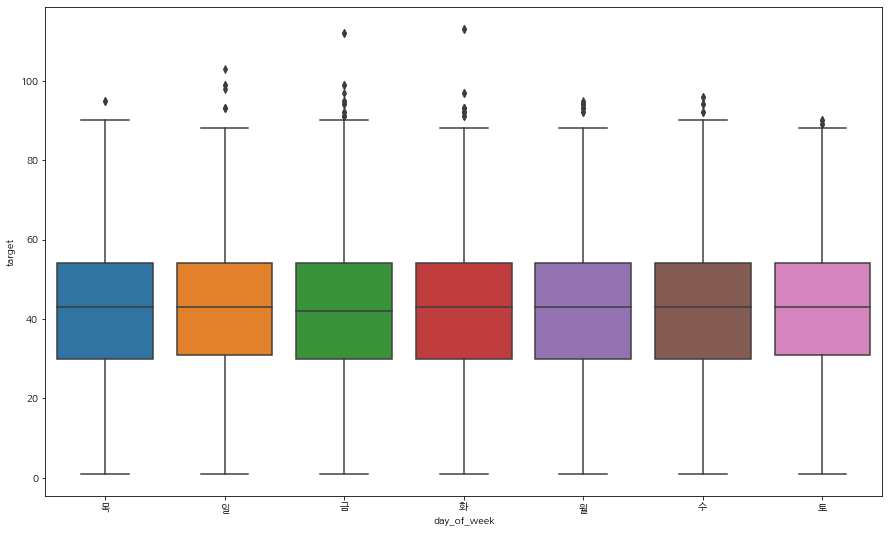

In [4]:
#Q2) 요일별 교통량 분포를 box plot으로 그리고 요일별로 차이
pyplot.rcParams['font.family'] = 'NanumGothic'
dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.boxplot(
    ax=ax,
    data=data,
    x="day_of_week",
    y="target")

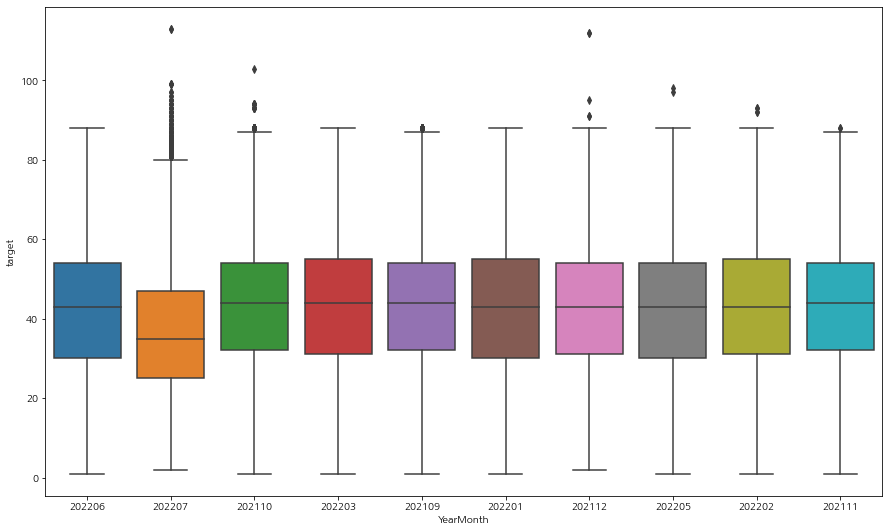

In [34]:
#Q3) 연도+월별 교통량 분포를 box plot으로 그리고 시간이 흐름에 따라 교통량 차이
dims = (15, 9)
fig, ax = pyplot.subplots(figsize=dims)
data['base_date']=data['base_date'].astype(str)
data['YearMonth'] = data['base_date'].str.slice(start=0, stop=6) 
ax=sns.boxplot(
    ax=ax,
    data=data,
    x="YearMonth",
    y="target")

<AxesSubplot:xlabel='lane_count', ylabel='target'>

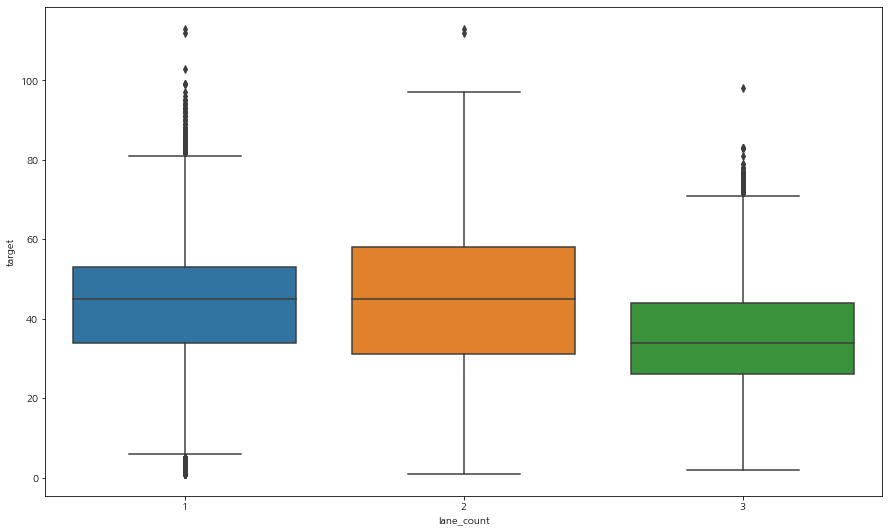

In [38]:
#Q4) lane_count별 교통량 분포를 box plot으로 그리고 lane_count의 차이가 교통량 차이
dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.boxplot(
    ax=ax,
    data=data,
    x="lane_count",
    y="target")

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

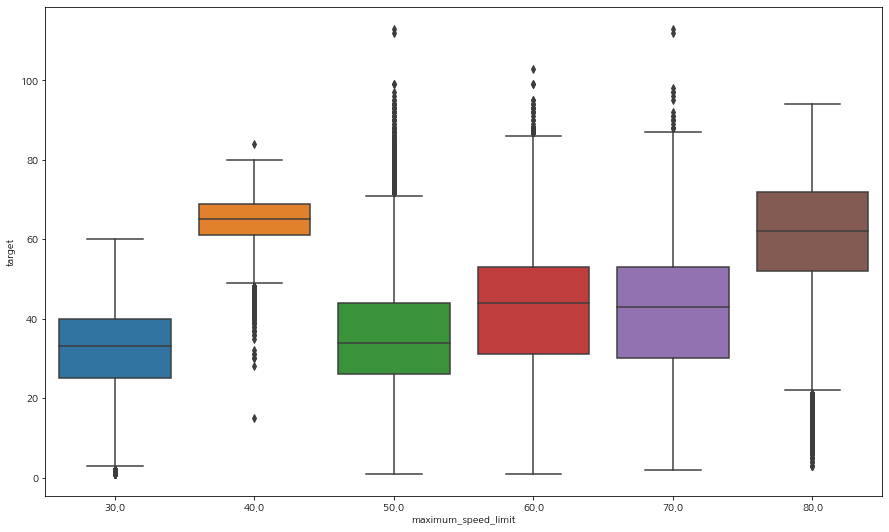

In [25]:
#Q5) maximum speed limit 별 교통량 분포
dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.boxplot(
    ax=ax,
    data=data,
    x="maximum_speed_limit",
    y="target")

<AxesSubplot:xlabel='road_rating', ylabel='maximum_speed_limit'>

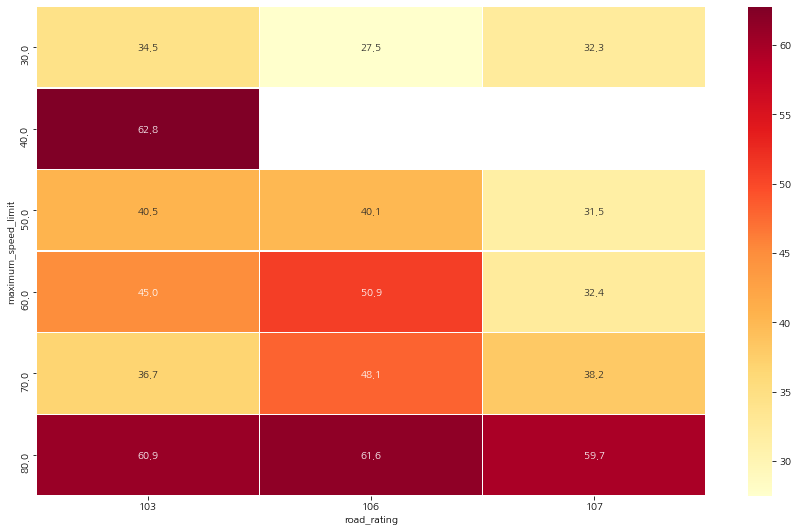

In [20]:
#시각화를 통해 교통량과 상관이 제일 큰 것 같은 두 변수를 선택하고 두 변수에 따른 교통량 분포를 알기 위한
heat = data.groupby(['maximum_speed_limit', 'road_rating'])['target'].mean().unstack()
heat

dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.heatmap(heat, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.1f', # 소수점 포맷팅 형태
            cmap = 'YlOrRd') # colormap 형태



In [14]:
print(data.corr(method='pearson'))

                     base_date  base_hour  lane_count  road_rating  \
base_date             1.000000  -0.008645    0.011463     0.018547   
base_hour            -0.008645   1.000000   -0.029194     0.031658   
lane_count            0.011463  -0.029194    1.000000    -0.095717   
road_rating           0.018547   0.031658   -0.095717     1.000000   
multi_linked          0.000832   0.005711   -0.026555     0.024218   
connect_code         -0.010633  -0.002649   -0.029290    -0.054160   
maximum_speed_limit  -0.018713  -0.036756    0.384002    -0.327474   
vehicle_restricted         NaN        NaN         NaN          NaN   
weight_restricted    -0.011030  -0.003231   -0.177224    -0.118630   
height_restricted          NaN        NaN         NaN          NaN   
road_type            -0.004599  -0.007880   -0.050715    -0.125618   
start_latitude       -0.016818  -0.021599    0.182674    -0.204793   
start_longitude      -0.004954  -0.011478   -0.094806     0.007401   
end_latitude        

<AxesSubplot:xlabel='end_longitude', ylabel='target'>

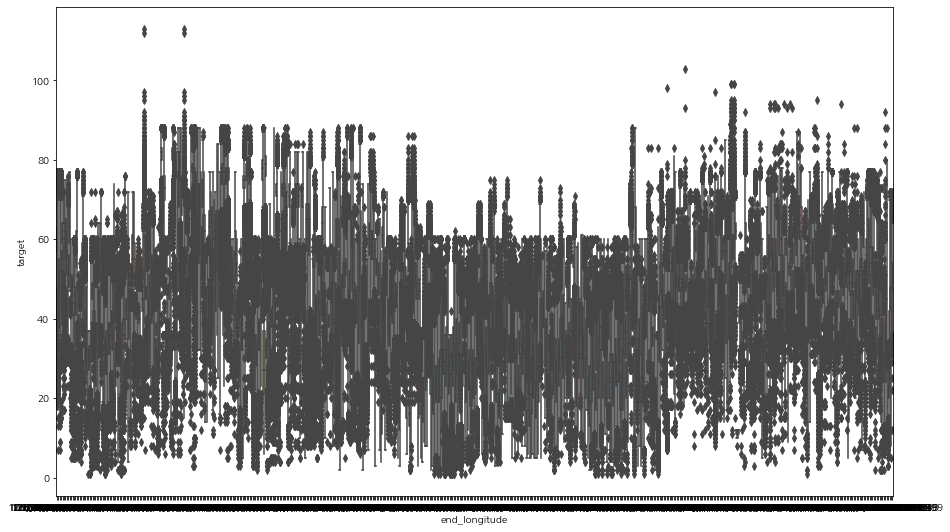

In [22]:
dims=(15,9)
fig,ax=pyplot.subplots(figsize=dims)
sns.boxplot(
    ax=ax,
    data=data,
    x="end_longitude",
    y="target")